In [61]:
# import libraries
import psycopg2
import pandas as pd

# get username and password for DB
from config import sql_u
from config import sql_pw
from config import sql_host


In [62]:
# connect to DB
conn = psycopg2.connect(
    host=sql_host,
    port='5432',
    database='postgres',
    user=sql_u,
    password=sql_pw)

cur = conn.cursor()

In [63]:
# Get styles table
# run query
sql_query = '''SELECT *
               FROM styles;
            '''

cur.execute(sql_query)

# convert query results to DF
styles_df = pd.DataFrame(cur.fetchall())

# add column names to DF
num_cols = len(cur.description)
col_names = [i[0] for i in cur.description]
styles_df.columns = col_names


In [64]:
# Get recipes table
# run query
sql_query = '''SELECT *
               FROM recipes;
            '''

cur.execute(sql_query)

# convert query results to DF
recipes_df = pd.DataFrame(cur.fetchall())

# add column names to DF
num_cols = len(cur.description)
col_names = [i[0] for i in cur.description]
recipes_df.columns = col_names

In [ ]:
# Get reviews table
# run query
sql_query = '''SELECT *
               FROM reviews;
            '''

cur.execute(sql_query)

# convert query results to DF
reviews_df = pd.DataFrame(cur.fetchall())

# add column names to DF
num_cols = len(cur.description)
col_names = [i[0] for i in cur.description]
reviews_df.columns = col_names

In [ ]:
# close sql connection
cur.close()
conn.close()

In [ ]:
# Take a look at ALL columns of each dataframe
pd.set_option('display.max_columns', None)


In [ ]:
# take a look at the styles_df
styles_df.head()

,style,styleid
0,Altbier,1
1,Alternative Grain Beer,2
2,Alternative Sugar Beer,3
3,American Amber Ale,4
4,American Barleywine,5


In [ ]:
# take a look at the recipes_df
recipes_df.head()

,beerid,name,url,style,styleid,size_l,og,fg,abv,ibu,color,boilsize,boiltime,boilgravity,efficiency,mashthickness,sugarscale,brewmethod,pitchrate,primarytemp,primingmethod,primingamount,userid
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,0.0,Specific Gravity,All Grain,0.0,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.07,70.0,0.0,Specific Gravity,All Grain,0.0,0.0,0,0,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,0.0,70.0,0.0,Specific Gravity,extract,0.0,0.0,0,0,0.0
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.8,54.48,8.5,26.5,60,0.0,70.0,0.0,Specific Gravity,All Grain,0.0,0.0,0,0,0.0
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.0,1.06,1.01,6.48,17.84,4.57,60.0,90,1.05,72.0,0.0,Specific Gravity,All Grain,0.0,19.0,Sukkerlake,6-7 g sukker/l,18325.0


In [ ]:
# How many rows are non-zero...
(recipes_df ==0).sum(axis=0)

beerid               0
name                 0
url                  0
style                0
styleid              0
size_l               0
og                   0
fg                   0
abv                 27
ibu               4159
color              101
boilsize             0
boiltime           283
boilgravity       2995
efficiency         101
mashthickness    29872
sugarscale           0
brewmethod           0
pitchrate        39303
primarytemp      22681
primingmethod        0
primingamount        0
userid           50490
dtype: int64

In [ ]:
# drop sparse columns
recipes_df = recipes_df.drop(columns = ["mashthickness", "pitchrate", "primarytemp", "userid"])

In [ ]:
(recipes_df ==0).sum(axis=0)

beerid              0
name                0
url                 0
style               0
styleid             0
size_l              0
og                  0
fg                  0
abv                27
ibu              4159
color             101
boilsize            0
boiltime          283
boilgravity      2995
efficiency        101
sugarscale          0
brewmethod          0
primingmethod       0
primingamount       0
dtype: int64

In [ ]:
# take a look at the reviews_df
reviews_df.sample(10)

,id,brewery_name,beer_style,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,beer_name,review_count
22277,22286,Chelsea Brewing Company,American Barleywine,1635.0,3.6666666666666665,3.4166666666666665,4.0,3.8333333333333335,3.9166666666666665,10.9,41832,Imperial Mild,6.0
29391,29416,Motor City Brewing Works,American Pale Ale (APA),1291.0,3.875,3.625,3.5,3.375,3.4375,5.2,10300,Motor City Brewing Pale Ale,8.0
31498,31521,Phillips Brewing Company,Märzen / Oktoberfest,2675.0,3.5,4.166666666666667,4.0,4.0,3.6666666666666665,5.0,33110,Oktoberfest Amber Lager,3.0
22864,22876,French Broad Brewing Co.,Irish Dry Stout,2455.0,4.125,3.875,4.0,4.0,3.875,5.8,41436,Irish Stout,4.0
10434,10435,Iron Hill Brewery & Restaurant,American Stout,6045.0,4.0,4.0,4.0,4.0,4.0,6.2,67703,Chocolate Cherry Stout,1.0
25291,25310,Les Brasseurs Du Sornin,Fruit / Vegetable Beer,10005.0,3.0,3.0,2.5,3.0,3.0,5.9,47371,La Cloche Rouge,1.0
2996,2993,Augusta Brewing Company,Belgian IPA,3777.0,4.5,4.333333333333333,4.0,4.333333333333333,4.166666666666667,9.0,65506,Augusta Tripel IPA,3.0
5612,5609,Marshall Wharf Brewing Company / Three Tides R...,Witbier,16842.0,3.5,4.0,3.5,3.5,4.0,5.8,75133,Bitty Belgian Ale-ien,1.0
19428,19434,Lunar Brewing,American Amber / Red Ale,3768.0,3.875,3.625,3.875,3.75,3.75,7.5,53663,Harvest Ale,4.0
43434,43485,Little Creatures Brewing Company,Märzen / Oktoberfest,744.0,3.75,4.0,3.75,3.5,3.5,5.0,45370,The Decommissionator,2.0


In [ ]:
# What are the most popular beers?
pop_beer = reviews_df.groupby(["beer_name", "review_count"]).sum().reset_index()
pop_beer.sort_values('review_count', ascending = False)



,beer_name,review_count,id,beer_beerid
696,90 Minute IPA,3206.0,731,2093
30295,Old Rasputin Russian Imperial Stout,3038.0,31856,412
37610,Sierra Nevada Celebration Ale,2929.0,39547,1904
39850,Stone Ruination IPA,2644.0,41818,4083
2626,Arrogant Bastard Ale,2633.0,2791,92
...,...,...,...,...
23876,L'alsacienne Sans Culotte Brasero De L'Hiver,1.0,25149,51574
23874,L'alsacienne Biere Blonde,1.0,25147,70112
23873,L'abus D'anges Heureux,1.0,25146,26065
23861,L'Impériale Express,1.0,25134,56216


In [ ]:
# What are the most popular beer styles?
pop_style = reviews_df.groupby(["beer_style", "review_count"]).sum().reset_index()
pop_style = pop_style.sort_values('review_count', ascending = False)


In [ ]:
# Let's make some plots!
import matplotlib.pyplot as plt
import numpy as np


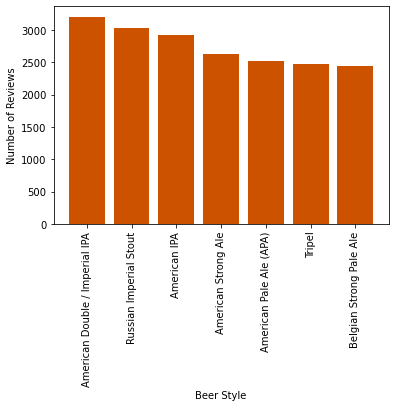

In [ ]:
# Bar Graph of Popular (most reviewed)beer styles
top_ten_styles = pop_style.head(10)
x = top_ten_styles["beer_style"]
y = top_ten_styles["review_count"]


plt.bar(x,y, color = '#CC5200')
plt.xlabel('Beer Style')
plt.ylabel('Number of Reviews')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# What are the highest rated styles?
# First, find beers with at least 100 ratings

pop_style = pop_style[pop_style.review_count > 100]
len(pop_style)

585

In [ ]:

best_style = pop_style.groupby(["beer_style", "review_taste"]).sum().reset_index()
best_style = best_style.sort_values('review_taste', ascending = False)

KeyError: 'review_taste'

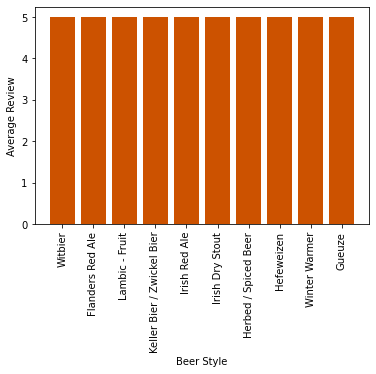

In [ ]:
# Bar Graph of Highest reviewed beer styles
top_ten_styles = best_style.head(10)
x = top_ten_styles["beer_style"]
y = top_ten_styles["review_taste"]


plt.bar(x,y, color = '#CC5200')
plt.xlabel('Beer Style')
plt.ylabel('Average Review')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
best_style.head(25)


,beer_style,review_taste,id,beer_beerid
15096,Witbier,5.0,34956,94891
9576,Flanders Red Ale,5.0,34540,130938
11418,Lambic - Fruit,5.0,66875,174459
11097,Keller Bier / Zwickel Bier,5.0,29549,45545
11008,Irish Red Ale,5.0,155096,270884
10904,Irish Dry Stout,5.0,132007,222862
10787,Herbed / Spiced Beer,5.0,101770,300061
10626,Hefeweizen,5.0,136896,151988
14846,Winter Warmer,5.0,110939,132209
10334,Gueuze,5.0,9281,57850
